# Исследование объявлений о продаже квартир

___
___
### Цели исследования 
 - Научиться определять рыночную стоимость объектов недвижимости;
 - Установить параметры для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия. 
 
 ___
 
### Входные данные 
Архив объявлений о продаже квартир в Санкт-Петербурге. Предоставлено сервисом "Яндекс.Недвижимость". 
 
 ___
 
### Описание данных 
 - *airports_nearest* - расстояние до ближайшего аэропорта в метрах (м)
 - *balcony* - число балконов
 - *ceiling_height* - высота потолков (м)
 - *cityCenters_nearest* - расстояние до центра города (м)
 - *days_exposition* - сколько дней было размещено объявление (от публикации до снятия)
 - *first_day_exposition* - дата публикации
 - *floor* - этаж
 - *floors_total* - всего этажей в доме
 - *is_apartment* - апартаменты (булев тип)
 - *kitchen_area* - площадь кухни (м<sup>2</sup>)
 - *last_price* - цена на момент снятия с публикации
 - *living_area* - жилая площадь (м<sup>2</sup>)
 - *locality_name* - название населённого пункта
 - *open_plan* - свободная планировка (булев тип)
 - *parks_around3000* - число парков в радиусе 3 км
 - *parks_nearest* - расстояние до ближайшего парка (м)
 - *ponds_around3000* - число водоёмов в радиусе 3 км
 - *ponds_nearest* - расстояние до ближайшего водоёма (м)
 - *rooms* - число комнат
 - *studio* - квартира-студия (булев тип)
 - *total_area* - площадь квартиры в квадратных метрах (м<sup>2</sup>)
 - *total_images* - число фотографий квартиры в объявлении
  
  ___
  
 ### Состав исследования
  
 <a href = '#step1'>1. Шаг 1. Изучение общей информации по входным данным.</a>      
  - [Вывод.](#conclusionStep1)  
    
 [2. Шаг 2. Предобработка данных.](#step2)   
  - [Обработка пропусков](#is_apartment)   
  - [2.1. Данные по ***'is_apartment'***](#is_apartment)
  - [2.2. Данные по ***'parks_nearest'***, ***'parks_around3000'***, ***'ponds_nearest'*** и ***'ponds_around3000'***](#nearest)   
  - [2.3. Данные по ***'balcony_count'***](#balcony_count)   
  - [2.4. Данные по ***'cityCenters_nearest'*** и ***'airports_nearest'***](#centers_and_airports)   
  - [2.5. Данные по ***'ceiling_height'***](#ceiling)   
  - [2.6. Данные по ***'days_exposition'***](#exposition)   
  - [2.7. Данные по ***'kitchen_area'***](#kitchen)   
  - [2.8. Данные по ***'floors_total'*** и ***'locality_name'***](#floors_and_locality)   
  
 [3. Шаг 3. Добавление данных в таблицу.](#step3)   
  - [3.1. Добавление дня, недели и года публикации](#adding_date)
  - [3.2. Добавляем цену квадратного метра](#price_of_m)
  - [3.3. Добавляем этаж квартиры; варианты — первый, последний, другой](#floor)
  - [3.4. Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей](#correlation)
  - [3.5. Измененяем типы данных](#changing_types)
 
 [4. Шаг 4. Исследовательский анализ данных.](#step4)   
  - [4.1. Изучение параметров](#data_research)
  - [4.2. Наблюдения по гитограммам](#observations)
  - [4.3. Анализ топ 10 населённых пунктов с наибольшим количеством объявлений](#analize)
  - [4.4. Анализ квартир в центре](#estate_center)
 
 [5. Шаг 5. Общий вывод.](#step5)
 
 ___
 ___

<a id = 'step1'></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

___
 Импортируем необходимые библиотеки (в процессе исследования их количество увеличится).   
 Считаем исходные данные. Видно что они склеены, в качестве разделителя использована табуляция (учитываем это при присвоении данных DataFrame-у).   
 Проверим правильность названия колонок. При необходимости изменим их названия для большей ясности.   
 Получим информацию о DataFrame.  
 Получим статистические данные.   
___
___

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(estate_data.columns)
estate_data = estate_data.rename(columns={'balcony' : 'balcony_count', 'open_plan' : 'is_open_plan', 'rooms' : 'rooms_count', 'studio' : 'is_studio'})
display(estate_data.head(10))
print('_______________________________________________________________')
print('_______________________________________________________________')
estate_data.info()
print('_______________________________________________________________')
print('_______________________________________________________________')
display(estate_data.describe())
print('_______________________________________________________________')
print('_______________________________________________________________')

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

,total_images,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_count,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


_______________________________________________________________
_______________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms_count             23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
is_studio               23699 non-null bool
is_open_plan            23699 non-null bool
kitchen_area            21421 non-null float64
balcony_count           12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     181

,total_images,last_price,total_area,rooms_count,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony_count,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


_______________________________________________________________
_______________________________________________________________


___
В глаза сразу бросается большое значение NaN. Визуализируем содержание NaN по столбцам.   
(https://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.plot.html)   
Посчитаем процент отсутствующих данных по каждому столбцу, отсортируем и выведем в горизонтальную (для удобства восприятия) столбчатую диаграмму.
___
___

Text(0.5, 0, '% of NaN')

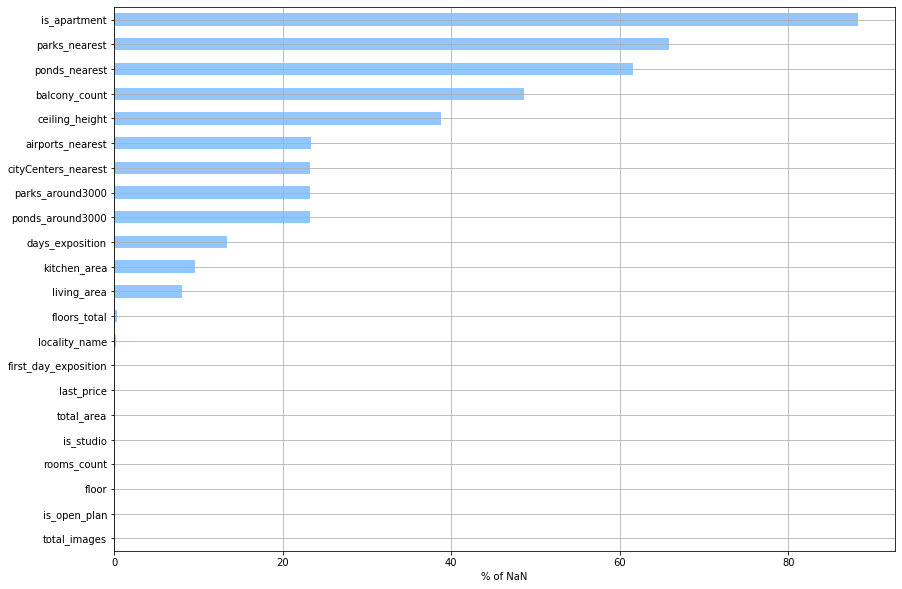

In [340]:
percent_of_nulls = (estate_data.isnull().sum()/len(estate_data)*100).sort_values()
percent_of_nulls.plot(kind = 'barh', grid = True, figsize = (14, 10)).set_xlabel('% of NaN')

<a id = 'conclusionStep1'></a>
### Вывод
___
Количество пропущенных значений действительно очень велико.
Попробуем понять почему: 
 - в колонках 'is_apartment', 'parks_nearest', 'pounds_nearest', 'balcony_count', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' отсутствующие значения могут означать '0' для числовых данных, таких как 'balcony_count', либо False - для булевых, таких как 'is_apartment'. 
 - в остальных колонках, данные в которых не могут равнятся нулю ('kitchen_area', 'living_area' и другие), отсутствующие значения, видимо, появились в связи с ошибками формирования набора данных, либо они не были внесены продавцами.   
 
 <font color = #008080>Разберём более подробно колонки с пропущенными значениями и что с этим можно сделать.</font>
   
   - *is_apartment* - **заполняется пользователем**. Наиболее очевидным кажется что NaN эквивалетно False. Вряд ли продавец не в курсе того, что он когда-то покупал и сейчас продаёт. При этом апартаменты значительно дешевле квартир, на основании чего можно будет сделать вывод о том, является ли продаваемая позиция апартаментами или квартирой. 
   - *parks_nearest* и *ponds_nearest* - **получены на основе картографических данных**. Возможно данные не были сгенерированы системой. Не считаю эти данные сильно значимыми, не вижу возможности на данном этапе проставить логические значения расстояний. Ввиду этого предлагается просто заменить отсутствующие значения на 0, особенно с учётом того, что в этом столбце нет нулевых или отрицательных значений, следовательно отсутствующие значения, скорее всего означают отсутствие парков или водоёмов в радиусе 3000 метров. 
   - *balcony_count* - **заполняется пользователем**. Возможно, что NaN означает отсутствие балкона. Однако *value_counts()* показывает что в этой колонке присутствуют значения от 0 до 5 включительно с шагом 1. Более 2-х балконов звучит странно и неправдоподобно. Возможно некоторые пользователи указывали значение площади балкона, а не их количество.
   - *ceiling_height* - **заполняется пользователем**. Вряд ли многие хотели тратить силы на измерение высоты потолков, поэтому так много отсутствующих значений. Тем не менее - это довольно важный параметр. Зная, что обычно жилые районы и/или населённые пункты застраивают однотипными домами (в плане требований к архитектурно-планировочным решениям) принято решение заменить отсутствующие значения высоты потолков на среднее по населённому пункту.
   - *airports_nearest* и *cityCenters_nearest* - **получены на основе картографических данных**. Возможно данные не были сгенерированы системой. Однако эти данные считаю важными в плане формирования цены квартиры. Будем думать, что с ними делать.
   - *parks_around3000*, *ponds_around3000* - **получены на основе картографических данных**. Здесь всё аналогично данным колонок *parks_nearest* и *ponds_nearest*.
   - *days_exposition* - **заполняется пользователем**. Отсутствие данных может быть вызвано тем, что пользователи мог не закрыть объявление о продаже квартиры, либо квартира продавалась на момент формирования архива. Не считаю этот параметр важным для ценообразования квартиры, однако, возможно, он выжен при попытке выявления мошеннических действий. Посмотрим, что с этим можно сделать.
   - *kitchen_area*, *living_area* - **заполняется пользователем**. Возможно пропуски связаны с квартирами-студиями, так как в них проблематично отделить жилую площадь от площади кухни. В пользу этого говорит и то, что в данных *total_area* отсутствуют пропущенные значения.
   - *floors_total* - **заполняется пользователем**. Возможно не внесено продавцами. Вряд ли сильно влияет на ценообразование да и процент отсутвующих данных не так высок. Заполним по аналогии с *ceiling_height* - в зависимости от населённого пунтка. 
   - *locality_name* - **заполняется пользователем**. Возможно не внесено продавцом. Заменим на 'Санкт-Петербург' в строках, в которых присутствует расстояние до центра меньшее 17 км, так как среднее расстояние от центра до Лен.области равно 17 км.
___
___

### <center>Альтернативные варианты способов заполнения пропусков </center>


   - *is_apartment* - **заполняется пользователем**. Наиболее очевидным кажется что NaN эквивалетно False. Вряд ли продавец не в курсе того, что он когда-то покупал и сейчас продаёт. При этом апартаменты значительно дешевле квартир, на основании чего можно будет сделать вывод о том, является ли продаваемая позиция апартаментами или квартирой.   
    <font color="red" face="Arial">Далее по тетрадке я остановился на том, что у нас недостаточно данных для замены пропусков. Тукущее предположение о значительной разнице в цене при остальных совпадающих параметрах верно больше для новостроек, когда в квартиру/аппараменты не внесены никакие изменения (ремонт, перепланировка или что-то подобное).</font>   
    
   - *parks_nearest* и *ponds_nearest* - **получены на основе картографических данных**. Возможно данные не были сгенерированы системой. Не считаю эти данные сильно значимыми, не вижу возможности на данном этапе проставить логические значения расстояний. Ввиду этого предлагается просто заменить отсутствующие значения на 0, особенно с учётом того, что в этом столбце нет нулевых или отрицательных значений, следовательно отсутствующие значения, скорее всего означают отсутствие парков или водоёмов в радиусе 3000 метров.   
   <font color="red" face="Arial">Тут корректировка: согласен - слепо заменить всё на 0 может быть черевато... всяким) Но, так как у нас эти данные связаны с данными о количестве парков/прудов в радиусе 3-х км, можно заполнить нулями строки, в которых так же нулевые значения для количества парков/прудов в указанном радиусе. Остальное оставить пропущенным. Далее это у меня реализовано.</font>   
   - *balcony_count* - **заполняется пользователем**. Возможно, что NaN означает отсутствие балкона. Однако *value_counts()* показывает что в этой колонке присутствуют значения от 0 до 5 включительно с шагом 1. Более 2-х балконов звучит странно и неправдоподобно. Возможно некоторые пользователи указывали значение площади балкона, а не их количество.   
   <font color="red" face="Arial">Тут корректировка: согласен - рациональнее оставить NaN. С одной стороны - сам же сказал что присутствуют значения "0", значит продавцы указывают и отсутствие балконов. С другой стороны - сложно представить что человек может не указать наличие балкона при продаже, это ведь денег стоит. Так что не исключена ошибка формирования датафрейма. При этом я остаюсь во мнении, что кто-то мог указать площадь балкона, вместо количества, ранее заполняя площади жилую/кухни/общую... Мы же не знаем, как выглядит форма заполнения объявления о продаже) Просто 5 балконов с одной стороны выглядят... маловероятно. Но с другой - это Питерская архитектура, там чего только не встречается)</font>
   - *ceiling_height* - **заполняется пользователем**. Вряд ли многие хотели тратить силы на измерение высоты потолков, поэтому так много отсутствующих значений. Тем не менее - это довольно важный параметр. Зная, что обычно жилые районы и/или населённые пункты застраивают однотипными домами (в плане требований к архитектурно-планировочным решениям) принято решение заменить отсутствующие значения высоты потолков на среднее по населённому пункту.   
   <font color="red" face="Arial">Как окончивший строительный ВУЗ скажу, что остаюсь при мнении что населенные пункты (районы) в большинстве случаем застраивают однотипными, в плане планировочных решений, домами. Но согласен с тем что заменить на медианные значения будет рациональнее.</font>
   - *airports_nearest* и *cityCenters_nearest* - **получены на основе картографических данных**. Возможно данные не были сгенерированы системой. Однако эти данные считаю важными в плане формирования цены квартиры. Будем думать, что с ними делать.   
   <font color="red" face="Arial">Считаю, что принятое решение о заполнении на основании имеющихся данных в зависимости от населённого пункта рационально в рамках данного проекта. Стоит только, опять, вместо среднего взять медианное значение. P.s.: я видел решения работы с яндекс геокодом, фолиумом и т.д., и обязательно с ними побалуюсь позже, но сейчас время ограничено</font>
   - *parks_around3000*, *ponds_around3000* - **получены на основе картографических данных**. Здесь всё аналогично данным колонок *parks_nearest* и *ponds_nearest*.   
   <font color="red" face="Arial">Аналогично с *parks_nearest* и *ponds_nearest*</font>
   - *days_exposition* - **заполняется пользователем**. Отсутствие данных может быть вызвано тем, что пользователи мог не закрыть объявление о продаже квартиры, либо квартира продавалась на момент формирования архива. Не считаю этот параметр важным для ценообразования квартиры, однако, возможно, он важен при попытке выявления мошеннических действий. Посмотрим, что с этим можно сделать.
   - *kitchen_area*, *living_area* - **заполняется пользователем**. Возможно пропуски связаны с квартирами-студиями, так как в них проблематично отделить жилую площадь от площади кухни. В пользу этого говорит и то, что в данных *total_area* отсутствуют пропущенные значения.
   - *floors_total* - **заполняется пользователем**. Возможно не внесено продавцами. Вряд ли сильно влияет на ценообразование да и процент отсутвующих данных не так высок. Заполним по аналогии с *ceiling_height* - в зависимости от населённого пунтка. 
   - *locality_name* - **заполняется пользователем**. Возможно не внесено продавцом. Заменим на 'Санкт-Петербург' в строках, в которых присутствует расстояние до центра меньшее 17 км, так как среднее расстояние от центра до Лен.области равно 17 км.
   <font color="red" face="Arial">К последним четырём у меня нет дополнительных комментариев</font>

<a id = 'step2'></a>
### Шаг 2. Предобработка данных

___
Перед предобработкой, в частности - заполнением отсутствующих значений, построим диаграммы размаха, чтобы впоследствии оценить изменения, которые мы получим в результате предобработки.
___
___

In [341]:
#column_list = ['parks_nearest', 'ponds_nearest', 'balcony_count', 'ceiling_height',
#               'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000',
#               'days_exposition', 'kitchen_area', 'living_area', 'floors_total']
#ax = estate_data[column_list].plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))


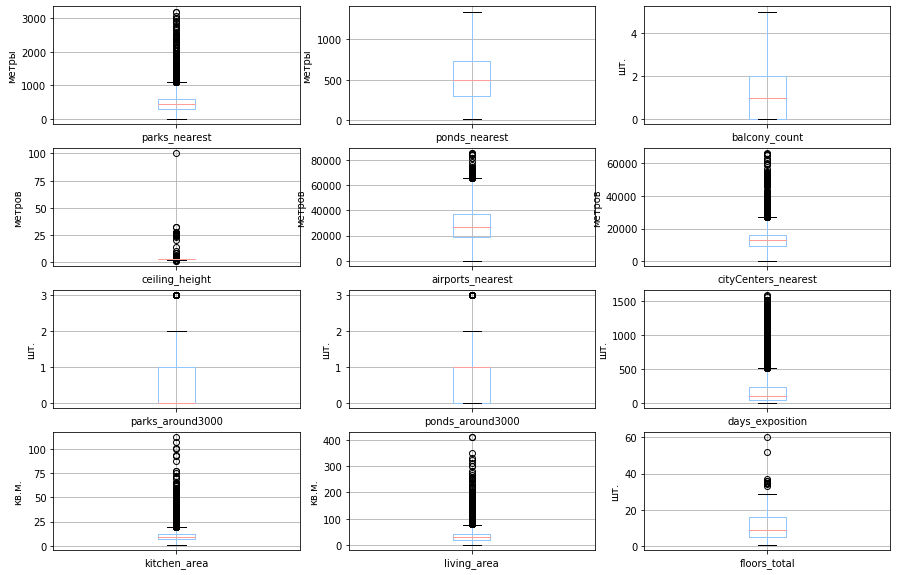

In [342]:
rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15,10))
column_list = ['parks_nearest', 'ponds_nearest', 'balcony_count', 'ceiling_height',
               'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000',
               'days_exposition', 'kitchen_area', 'living_area', 'floors_total']
label_list = ['метры', 'метры', 'шт.', 'метров', 'метров', 'метров', 'шт.', 'шт.', 'шт.', 'кв.м.', 'кв.м.', 'шт.']
count = 0
for r in range(rows):
    for c in range(cols):
        ax = estate_data.boxplot(column = column_list[count], ax = axes[r,c], fontsize=10)
        ax.set_ylabel(label_list[count])
        count += 1

In [343]:
print (pd.__version__)

0.25.1


___
Сразу стоит отметить наличие явных выбросов в некоторых данных (например 100-метровая высота потолков) и просто странных данных (по условию ближайшими парки считаются в радиусе 3000 м, однако есть расстояния немного большие).   
Однако полноценным анализом мы займёмся позже: сейчас наша задача - заполнение отсутствующих значений.
___
___

___
### Обрабатываем пропуски 
 <a id = 'is_apartment'></a>
 - **данные по *is_apartment*** 
 
 
Согласно данным рынка недвижимости и строительных организаций цена на апартаменты меньше цены на обычные квартиры на 15-20% при прочих одинаковых условиях.   
Рассмотрим определенные в данных апартаменты и обычные квартиры.   
Сравним данные по общей площади и цене продажи.
___
___

mean                median           
                last_price total_area last_price total_area
is_apartment                                               
False         6.522225e+06  61.123761  4700000.0       54.0
True          1.292420e+07  83.325800  6900000.0       64.0

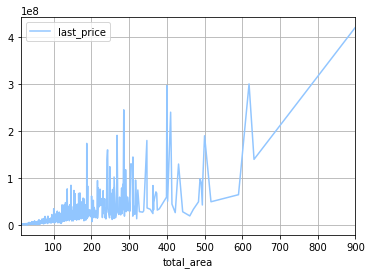

In [344]:
display(estate_data.pivot_table(index = 'is_apartment', values = ['last_price', 'total_area'], aggfunc = ['mean', 'median']))
nan_flats = estate_data[estate_data['is_apartment'].isnull()]
nan_flats.pivot_table(index = 'total_area', values = 'last_price').plot(kind = 'line', grid = True)

mean                median           
                last_price total_area last_price total_area
is_apartment                                               
False         6.522225e+06  61.123761  4700000.0       54.0
True          1.292420e+07  83.325800  6900000.0       64.0

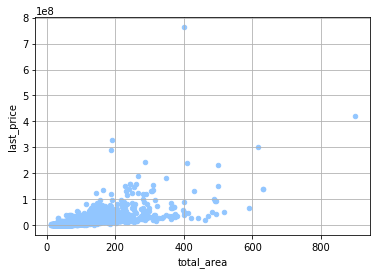

In [345]:
display(estate_data.pivot_table(index = 'is_apartment', values = ['last_price', 'total_area'], aggfunc = ['mean', 'median']))
nan_flats = estate_data[estate_data['is_apartment'].isnull()]
nan_flats.plot(kind = 'scatter', grid = True, x = 'total_area', y = 'last_price')

___
Мы видим, что как по медианным, так и по осреднённым данным что общая площадь, что цена продажи апартаментов выше. При этом получается что средняя цена за квадратный метр апартаментов тоже выше почти на 30 000 рублей. Следовательно предлагаемый изначально метод оценки и замены отсутствующих значений по соотношению "цена-общая площадь" неприемлим.   
Это так же хорошо видно из построенной диаграммы зависимости цены от площади для строк с отсутсвующими значениями в колонке "апартаменты". Видно что чем больше площадь, тем выше цена, что логично. Однако с ростом площади растет и размах цены от среднего значения. Помимо ошибочных данных такой размах может быть вызван множеством факторов: наличие/отсутствие ремонта, его качество, местоположение квартиры/апартаментов и многого другого.   
Ввиду этого данных для адекватной замены отсутствующих значений недостаточно. Заменить всё только на False (или на True) не логично, так как появится либо очень много апартаментов, либо останется очень мало, что не соответствует текущей картине рынка.  
Оставляем пропущенные значения.
___
___

In [346]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(0)

___
 <a id = 'nearest'></a>
 - **данные по *parks_nearest*, *parks_around3000*, *ponds_nearest* и *ponds_around3000***   
 
 Заполнить пропуски нам помогут следующие выкладки:   
  - *parks_nearest* - расстояние до ближайшего парка;
  - *parks_around3000* - парки в радиусе 3000 м.   
  
  Следовательно:   
  - если в радиусе 3000 м нет парков, то и расстояние до ближайшего отсутствует (возможно отсюда и появились NaN). Заменим на '-1';   
  - если в радиусе 3000 м есть парки, то должно быть и расстояние до ближайшего. Однако при отсутствии расстояния занести какое-либо значение проблематично;   
  - если есть расстояние до ближайшего парка и оно меньше 3000, значит и количество парков должно быть минимум 1;   
  - если нет расстояния до ближайшего парка, то и парков в радиусе 3000 м не должно быть. Проблема в том, что минимальное расстояние до парка в текущех данных равно 1 м, что странно, при этом есть 6 объявлений с расстояниями до парка менее 10 м. Возможно таким образом продавец хотел указать что парк прямо перед подъездом, такое бывает, поэтому с такими данными мы ничего делать не будем, а так как не имее возможности измерить расстояния сами, то и NaN оставляем;   
  - расстояние до ближайшего парка не должно быть больше 3000 м. Если такие попадутся - заменим на '-1'.
  
  Для прудов вышеуказанная последовательность тоже применима.
___
___

Количество отсутствующих значений для *parks_nearest*

In [347]:
print('Количество отсутствующих значений для parks_nearest:', estate_data['parks_nearest'].isna().sum())

Количество отсутствующих значений для parks_nearest: 15620


___
Заменяем значения колонки *parks_nearest* на '-1' для строк, в которых *parks_around3000* а *parks_nearest* равен NaN.
___
___

In [348]:
#estate_data.loc[(estate_data['parks_around3000'] == 0) & (estate_data['parks_nearest'].isna()), 'parks_nearest'] = estate_data.loc[(estate_data['parks_around3000'] == 0) & (estate_data['parks_nearest'].isna()), 'parks_nearest'].fillna(-1)
#print('Количество отсутствующих значений для parks_nearest:', estate_data['parks_nearest'].isna().sum())

In [349]:
#estate_data.loc[estate_data['parks_nearest'] > 3000, 'parks_nearest'] = -1

In [350]:
#display(estate_data.loc[(estate_data['parks_around3000'] == 0) & (estate_data['parks_nearest'].isna() == False) & (estate_data['parks_nearest'] != -1)])

___
Проделываем то же самое для прудов
___
___

In [351]:
#estate_data.loc[(estate_data['ponds_around3000'] == 0) & (estate_data['ponds_nearest'].isna() == False)]

In [352]:
#display(estate_data.loc[estate_data['ponds_nearest'] > 3000])

___
Однако для прудов видим, что:
 - в строках с отсутствующими значениями по колонке *'ponds_around3000'* нет расстояний до ближайших прудов;
 - нет расстояний больше 3000 м.
 
Для заполнения остальных пропусков не хватает данных, оставляем.   
Далее работаем с балконами. Отсутствущие значения заполняем нулями, так как самая вероятная причина отсутствующих значений - продавец, при отсутствии балкона, не трогал поле для заполнения, при том что там есть 0.
___
___

___
<a id = 'balcony_count'></a>
- **данные по *'balcony_count'***   
___
___

In [353]:
estate_data['balcony_count'] = estate_data['balcony_count'].fillna(0)
print(estate_data['balcony_count'].isna().sum())

0


___
 <a id = 'centers_and_airports'></a>
 - **данные по *'cityCenters_nearest'* и *'airports_nearest'***   
___
___

In [354]:
estate_data['cityCenters_nearest'].isnull().sum()

5519

In [355]:
estate_data['airports_nearest'].isnull().sum()

5542

In [356]:
#estate_data.loc['cityCenters_nearest'] = estate_data.groupby('locality_name')['cityCenters_nearest'].apply(lambda x: x.fillna(x.median()))

In [357]:
estate_data['cityCenters_nearest'].isnull().sum()

5519

In [358]:
#estate_data['airports_nearest'] = estate_data.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(x.median()))

In [359]:
estate_data['airports_nearest'].isnull().sum()

5542

___
 <a id = 'ceiling'></a>
 - **данные по *'ceiling_height'***   
___
___

In [360]:
estate_data['ceiling_height'].isnull().sum()

9195

___
Разбираемся с данными в *'ceiling_height'*. Будем заполнять пропуски в зависимости от удаленности от центра. Категоризируем данные по удаленности и возмём среднюю высоту потолков по категориям, чтобы заполнить пропуски.   

Разбивать будем на следующие категории:

 - 0-5 км от центра (категория 'центр');
 - 5-10 км от центра (категория '1-й круг');
 - 10-15 км от центра (категория '2-й круг');
 - больше 15 км от центра (категория 'лен. область').
 
 Напишем функцию, категоризирующую данные.
___
___

In [361]:
def define_distance_category(row):
    if row['cityCenters_nearest'] < 5000:
        return 'центр'
    elif row['cityCenters_nearest'] < 10000:
        return '1-й круг'
    elif row['cityCenters_nearest'] < 15000:
        return '2-й круг'
    elif row['cityCenters_nearest'] >= 15000:
        return 'ЛО'

___
Применим её к датасету и посмотрим результаты.
___
___

In [362]:
estate_data['distance_from_center_category'] = estate_data.apply(define_distance_category, axis = 1)
estate_data[['locality_name', 'cityCenters_nearest', 'distance_from_center_category']].head(10)

,locality_name,cityCenters_nearest,distance_from_center_category
0,Санкт-Петербург,16028.0,ЛО
1,посёлок Шушары,18603.0,ЛО
2,Санкт-Петербург,13933.0,2-й круг
3,Санкт-Петербург,6800.0,1-й круг
4,Санкт-Петербург,8098.0,1-й круг
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,ЛО
7,Санкт-Петербург,11634.0,2-й круг
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,ЛО


___
Заполним пропуски в *'ceiling_height'* в зависимости от данных в *'distance_from_center_category'*.
___
___

In [363]:
estate_data.groupby('distance_from_center_category')['ceiling_height'].median().sort_values(ascending = False).to_frame()

,ceiling_height
distance_from_center_category,
центр,3.1
1-й круг,2.8
ЛО,2.6
2-й круг,2.6


In [364]:
#estate_data['ceiling_height'] = estate_data.groupby('distance_from_center_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

In [365]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_count,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_center_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,ЛО
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,ЛО
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2-й круг
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,1-й круг
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1-й круг


In [366]:
estate_data['ceiling_height'].isnull().sum()

9195

___
Отсутствующих данных по *'locality_name'* практически нет. Считаю имеет смысл заполнить пропуски в данных *'airports_nearest'* и *'cityCenters_nearest'* на основании средних данных по каждому из населённых пунктов.
При этом, считаю данные по расстоянию до аэропорта или городского центра бессмысленными, так как в общих чертах их можно представить зная название населенного пункта (например чтобы оценить уровень шума от пролетающих самолётов), а при необходимости воспользоваться картами для построения маршрута, так как простое указание прямого расстояния не учитывает особенности проезда/прохода и т.д.   
Предпочтительнее было бы работать с населёнными пунктами и адресом.   
   
   Итак, определим количество уникальных значений в *'locality_name'*.
___
___

___
 <a id = 'exposition'></a>
 - **данные по *'days_exposition'***   
___
___

In [367]:
print('Количество NaN по days_exposition:', estate_data['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3181


___
Эти данные заполняются самими пользователями после совершения сделки.   
Просто так взять среднее/медиану не подойдёт, как и установить зависимость этих данных от имеющихся.   
Оставляем пропуски.
___
___

___
 <a id = 'kitchen'></a>
 - **данные по *'kitchen_area'***   
___
___

В данных об общей площади, жилой площади и площади кухни у нас отсутствуют нулевые площади.

In [368]:
print('Количество NaN по kitchen_area:', estate_data['kitchen_area'].isnull().sum())

Количество NaN по kitchen_area: 2278


In [369]:
display(estate_data.loc[(estate_data['kitchen_area'].isna()) & (estate_data['living_area'].isna() == False) & (estate_data['total_area'].isna() == False) & (estate_data['balcony_count'] == 0)])

,total_images,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_count,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_center_category
188,15,4600000.0,38.5,2019-04-16T00:00:00,1,2.50,12.0,18.50,5,0,...,0.0,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN,ЛО
199,4,3735325.0,37.4,2019-03-22T00:00:00,1,2.73,12.0,17.00,4,0,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,21.0,None
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,0,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,ЛО
248,7,4100000.0,31.0,2015-08-02T00:00:00,1,3.00,17.0,10.00,6,False,...,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,637.0,1-й круг
280,15,4900000.0,63.0,2017-04-26T00:00:00,2,NaN,9.0,34.40,5,0,...,0.0,Санкт-Петербург,40880.0,16747.0,0.0,NaN,0.0,NaN,22.0,ЛО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23546,20,3599000.0,45.0,2015-08-05T00:00:00,2,NaN,5.0,26.90,2,0,...,0.0,Санкт-Петербург,40744.0,10927.0,3.0,363.0,0.0,NaN,377.0,2-й круг
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,NaN,10.0,18.00,2,0,...,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0,None
23604,7,4300000.0,44.3,2019-04-13T00:00:00,2,2.50,9.0,27.00,1,False,...,0.0,Санкт-Петербург,17942.0,14060.0,0.0,NaN,0.0,NaN,NaN,2-й круг
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.60,10,False,...,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0,None


___
Изначально было предположение о том, что можно что-то придумать с известными жилой и общей площадями. Например: для квартир без балконов из общей площади вычесть жилую, и вычесть примерно 4 метра из предположения минимальных двух метров на санузел и коридор, однако при просмотре среза данных и в принципе из логики:
 - строка № 23579: 24,8 - 18 - 4 = 2,8 метра на кухню. Очень мало.
 - точное знание функциональных площадей важно как для аналитика, так и для покупателя.   

Ввиду этого считаю предпочтительным оставить пропуски в данных.

То же самое можно сказать и про пропуски в даных ***'living_area'***.
___
___

___
 <a id = 'floors_and_locality'></a>
 - **данные по *'floors_total'* и *'locality_name'***   
___
___

In [370]:
print('Количество NaN по floors_total:', estate_data['floors_total'].isnull().sum())
print('Количество NaN по locality_name:', estate_data['locality_name'].isnull().sum())

Количество NaN по floors_total: 86
Количество NaN по locality_name: 49


___
Пропущенных данных по этим колонкам меньше 1%. Статистику нам это не испортит. Оставляем пропуски.
___
___

___
Оценим результаты заполнения пропусков.
___
___

Text(0.5, 0, '% of NaN')

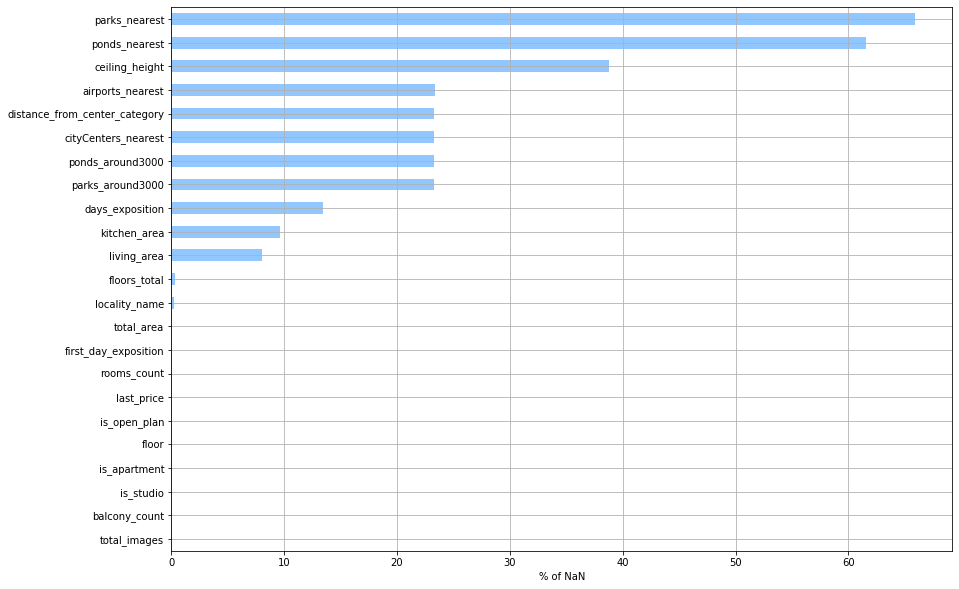

In [371]:
percent_of_nulls = (estate_data.isnull().sum()/len(estate_data)*100).sort_values()
percent_of_nulls.plot(kind = 'barh', grid = True, figsize = (14, 10)).set_xlabel('% of NaN')

___
Чтож, ситуация с пропусками значительно улучшилась, помимо данных с *'is_apartment'* и *'ponds_nearest'*.   
Займёмся изменением типов данных.   

Совместно с изменением типов данных займёмся подсчетом и добвлением в таблицу новых столбцов, так как их так же необходимо будет приводить к определённом типам (выполняем работу в Шаге 3).
___
___

<a id = 'step3'></a>
### Шаг 3. Посчитайте и добавьте в таблицу

___
Будем менять: 
 - *'last_price'* - в целочисленный тип; (так как стоимости исчисляются миллионами - копейки нам не важны)
 - *'total_area'* - округлим до одного знака после запятой; (всё-таки это площади с довольно высокой стоимостью за квадратный метр, лучше учесть десятые. Сотые не учитываем так как они могут быть простой ошибкой при измерении)
 - *'first_day_exposition'* - даты в datetime; (с этим форматом потом работать по дням, месяцам и годам)
 - *'ceiling_height'* - округлим до одного знака после запятой; (по нормам строительства потолки кратны 0,3 в определенном диапазоне)
 - *'floors_total', 'balcony_count'* - в целочисленный тип; (не может быть пол этажа или пол балкона)
 - *'living_area' и 'kitchen_area'* - округлим до одного знака после запятой; (всё-таки это площади с довольно высокой стоимостью за квадратный метр, лучше учесть десятые. Сотые не учитываем так как они могут быть простой ошибкой при измерении)
 - *'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'* - в целочисленный тип; (считаем в метрах. тут даже несколько десятков лишних сантиметров картины не испортят)
 - *'days_exposition'* - в целочисленный тип. (удобнее работать с целым числом дней. Да и в документах никто никда не пишет "Договор от 1 января 1970 года 00 часо 00 минут")))
___
___

In [372]:
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

___
<a id = 'adding_date'></a>
- **Добавляем день недели, месяц и год публикации объявления.**

In [373]:
estate_data['day']  = estate_data['first_day_exposition'].apply(lambda x: x.isoweekday())

In [374]:
dict_of_days = {
    1: 'понедельник',
    2: 'вторник',
    3: 'среда',
    4: 'четверг',
    5: 'пятница',
    6: 'суббота',
    7: 'воскресенье'
}

In [375]:
estate_data['day'] = estate_data['day'].map(dict_of_days)

In [376]:
estate_data['month'] = estate_data['first_day_exposition'].apply(lambda x: x.month)
estate_data['year'] = estate_data['first_day_exposition'].apply(lambda x: x.year)

___
<a id = 'price_of_m'></a>
- **Добавляем цену квадратного метра.**

In [377]:
estate_data['price_of_m2'] = estate_data['last_price'] / estate_data['total_area']

___
<a id = 'floor'></a>
- **Добавляем этаж квартиры; варианты — первый, последний, другой.**

In [378]:
estate_data['floor_category'] = np.where(estate_data['floor'] == 1, 'Первый', 'Другой')
estate_data['floor_category'] = np.where(estate_data['floor'] == estate_data['floors_total'], 'Последний', estate_data['floor_category'])

___
<a id = 'correlation'></a>
- **Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей.**

In [379]:
estate_data['living_area_part'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_area_part'] = estate_data['kitchen_area'] / estate_data['total_area']

___
<a id = 'changing_types'></a>
**Изменение типа данных.**
   
   На 'int' меняем много столбцов, так что автоматизируем этот процесс. Создадим список названий столбцов и в цикле пройдем по нему для приведения к целочисленному типу.

In [380]:
to_int_list = ['ponds_nearest', 'ponds_around3000', 'parks_nearest', 'parks_around3000', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'last_price', 'balcony_count', 'price_of_m2']

In [381]:
for column in to_int_list:
    estate_data[column] = estate_data[estate_data[column].notnull()][column].astype('int')

___
Аналогично постопаем для данных с плавающей точкой. Округлим их до двух знаков после запятой.

In [382]:
to_float_list = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'living_area_part', 'kitchen_area_part']

In [383]:
for column in to_float_list:
    estate_data[column] = estate_data[estate_data[column].notnull()][column].round(2)

___
Проверяем, что получилось.

In [384]:
print(type(np.nan))

<class 'float'>


In [385]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null int64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null datetime64[ns]
rooms_count                      23699 non-null int64
ceiling_height                   14504 non-null float64
floors_total                     23613 non-null float64
living_area                      21796 non-null float64
floor                            23699 non-null int64
is_apartment                     23699 non-null object
is_studio                        23699 non-null bool
is_open_plan                     23699 non-null bool
kitchen_area                     21421 non-null float64
balcony_count                    23699 non-null int64
locality_name                    23650 non-null object
airports_nearest                 18157 non-null float64
cityCe

In [386]:
print(estate_data.dtypes)

total_images                              int64
last_price                                int64
total_area                              float64
first_day_exposition             datetime64[ns]
rooms_count                               int64
ceiling_height                          float64
floors_total                            float64
living_area                             float64
floor                                     int64
is_apartment                             object
is_studio                                  bool
is_open_plan                               bool
kitchen_area                            float64
balcony_count                             int64
locality_name                            object
airports_nearest                        float64
cityCenters_nearest                     float64
parks_around3000                        float64
parks_nearest                           float64
ponds_around3000                        float64
ponds_nearest                           

<a id = 'step4'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

___
<a id = 'data_research'></a>
- **Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.**
___
___

In [387]:
estate_data[['total_area', 'last_price', 'rooms_count', 'ceiling_height']].describe()

,total_area,last_price,rooms_count,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


___
Определим выбросы значений и определяем границы "адекватных" значений исследуемых параметров (для этого придётся масштабировать *boxplot*).

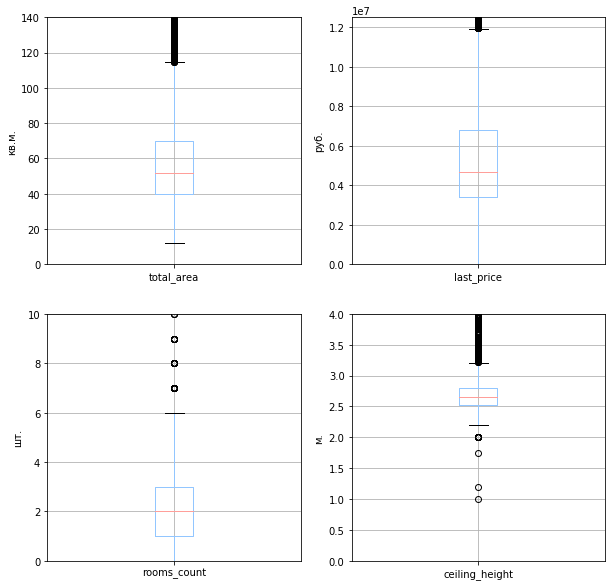

In [388]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10,10))
column_list = ['total_area', 'last_price', 'rooms_count', 'ceiling_height']
ylabels_list = ['кв.м.','руб.','шт.','м.']
ylims = [140, 1.25e+07, 10, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = estate_data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=10)
        ax.set_ylim([0, ylims[count]])
        ax.set_ylabel(ylabels_list[count])
        count += 1

___
Имеем следующие границы:   
- *total area* - 12 - 115 кв.м;
- *last_price* - 0 - 12 млн. руб;
- *rooms_count* - 0 - 6 комнат;
- *ceiling_height* - 2.4 - 3.3 м.

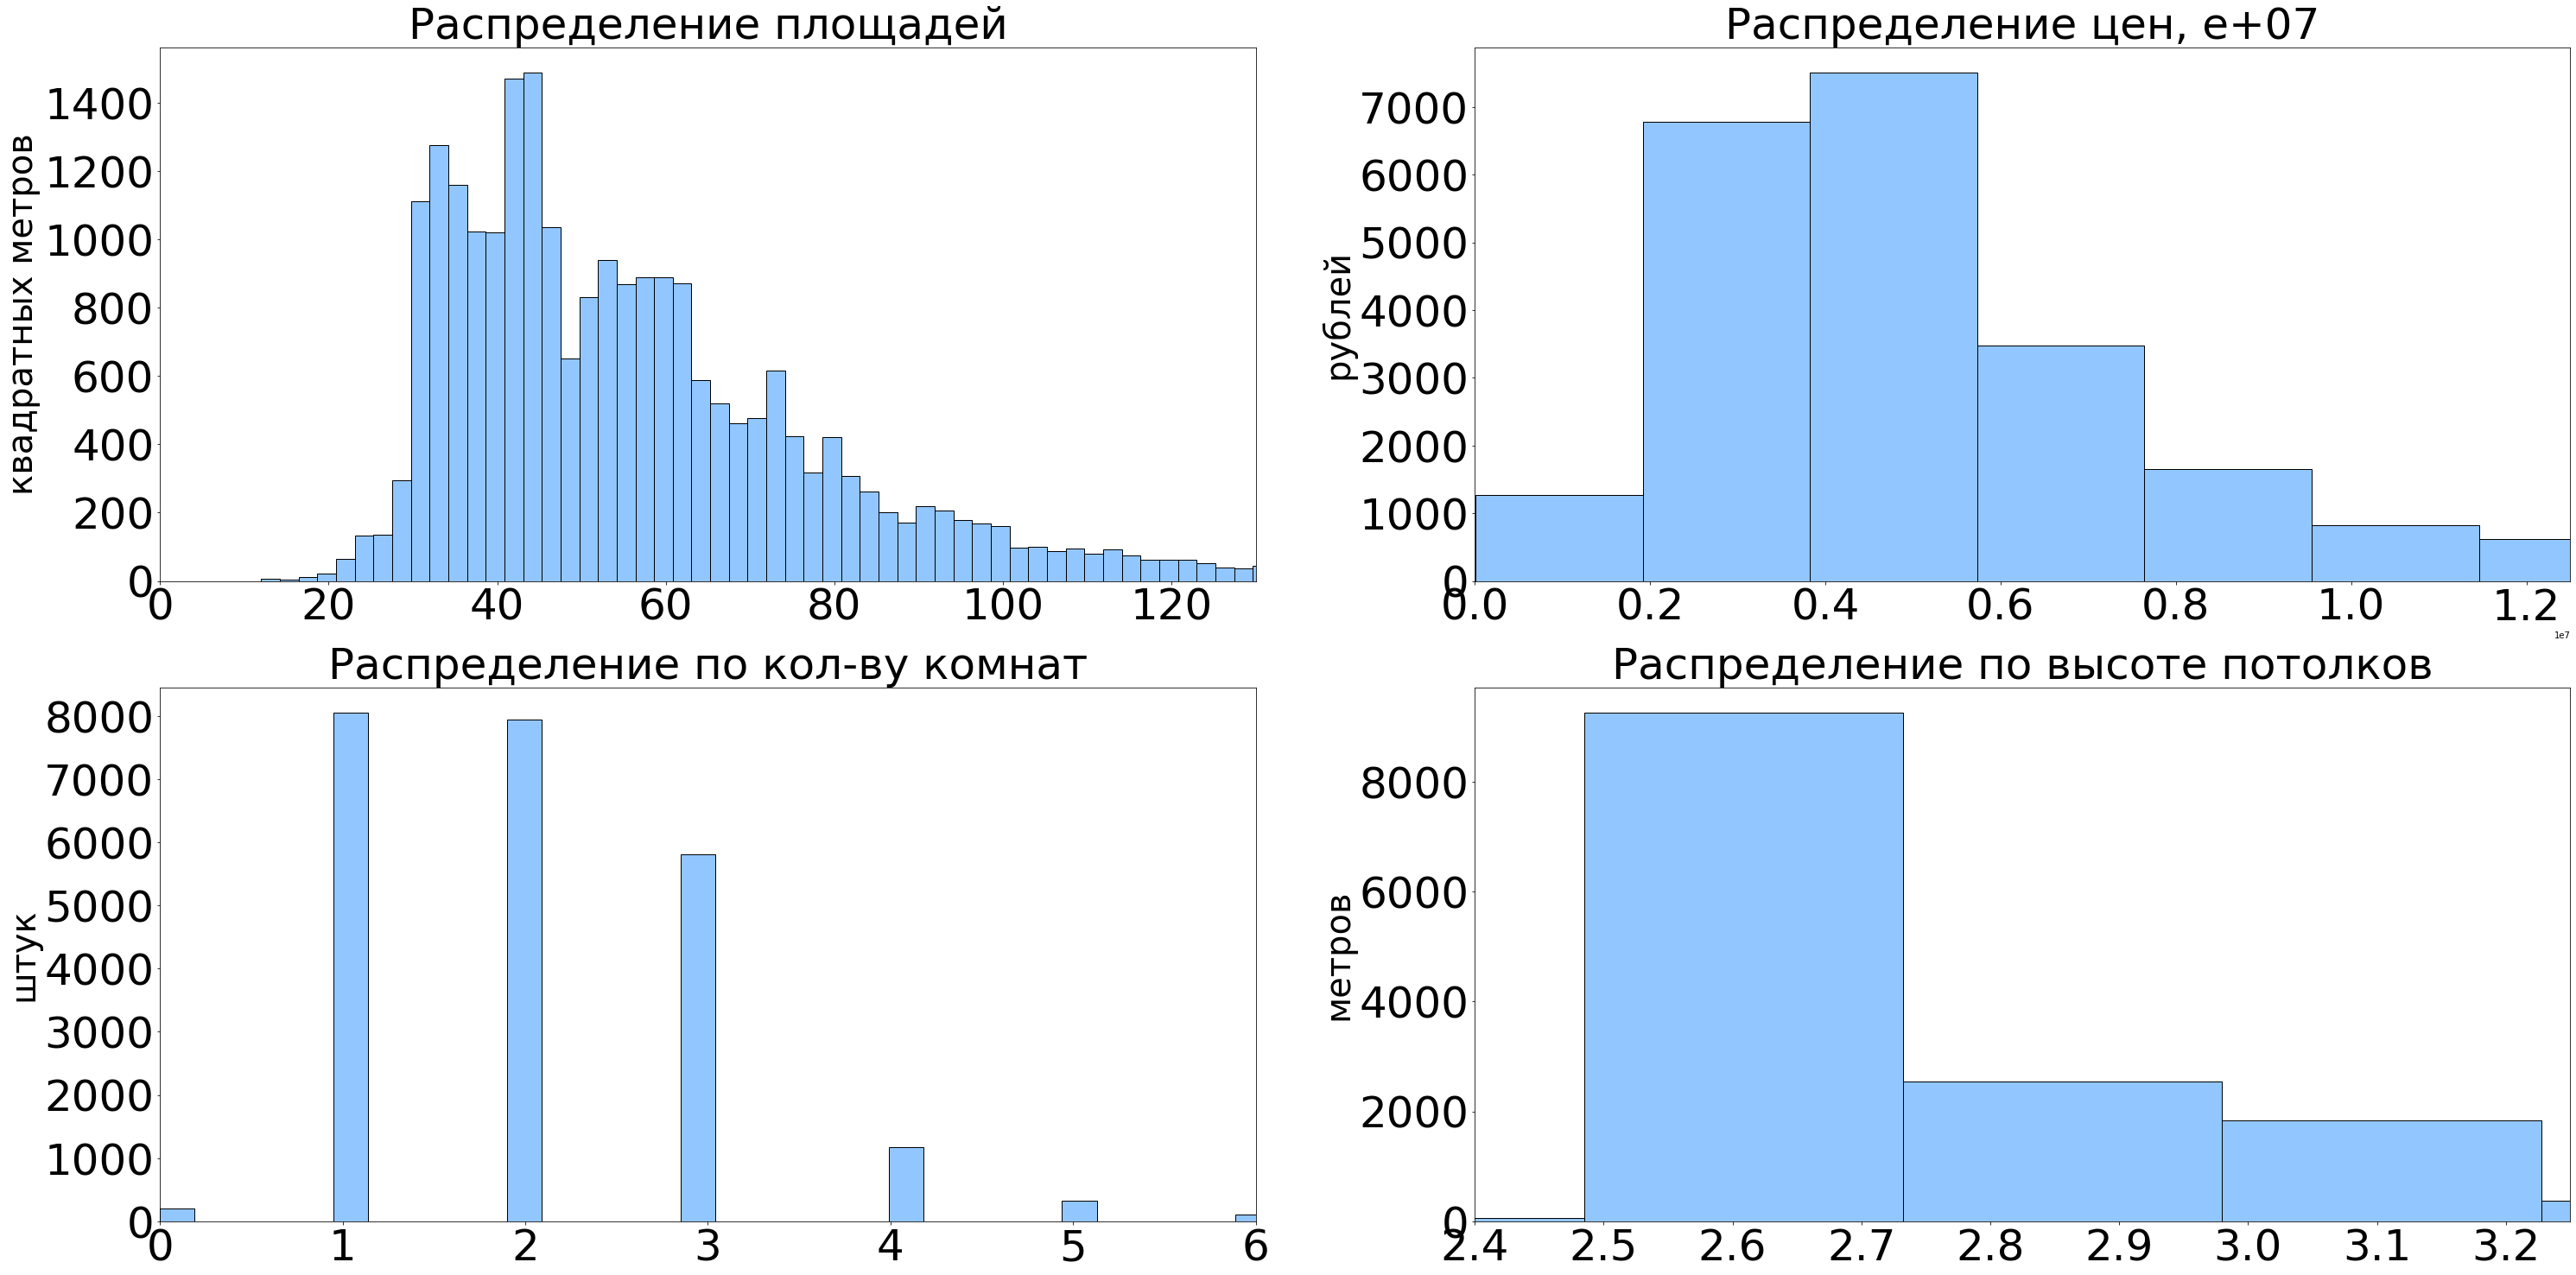

In [389]:
from matplotlib.lines import Line2D

plt.style.use('seaborn-pastel')

df_list = [estate_data['total_area'], estate_data['last_price'], estate_data['rooms_count'], estate_data['ceiling_height']]
df_titles_list = ['Распределение площадей', 'Распределение цен, e+07', 
                  'Распределение по кол-ву комнат', 'Распределение по высоте потолков']
ylabels = ['квадратных метров','рублей','штук','метров']
xlims_list = [130, 1.25e+07, 6, 3.25]
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize = (50,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count == 2:
            ax = df_list[count].plot(kind = 'hist', bins = 100, fontsize = 50, title = df_titles_list[count], ec = 'black', ax = axes[r,c])
            ax.set_xlim(0, xlims_list[count])
            ax.set_ylabel(ylabels[count])
        else:
            ax = df_list[count].plot(kind = 'hist', bins = 400, fontsize = 50, title = df_titles_list[count], ec = 'black', ax = axes[r,c])
            ax.set_ylabel(ylabels[count])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.set_ylabel(ylabels[count])
            else:
                ax.set_xlim(0, xlims_list[count])
                ax.set_ylabel(ylabels[count])
        ax.title.set_size(50)
        ax.yaxis.label.set_size(40)
        count += 1

___
<a id = 'observations'></a>
   **Наблюдения по гистограммам:**
- "Распределение площадей": большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на 40-44 кв.м.
- "Распределение цен": большинство квартир продаются по цене от 2 до 12 млн. руб. Пики приходятся на цены в промежутке между 2 и 6 млн.
- "Распределение по количеству комнат": примерно 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4.
- "Распределение по высоте потолков": большинство квартир имеют потолки высотой 2,5-2,7 м.

___
Изучим время продажи квартир.

In [390]:
estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

___
Среднее время продажи квартир равно 180 дней (пол года).
Медианное - 95 дней.
Минимальное - 1 день. Либо "звёзды сошлись" и человек, ищущий именно эту квартиру зашёл на сайт объевлений в день публикации объявления продавцом и они сразу совершили сделку. Либо продавец сразу после размещения объявления передумал и снял его.
Максимальное - 1580 дней. 5 лет. Тоже возможно, вдруг ну очень плохая по каким-либо параметрам квартира.
Вообще самым адекватным кажется время продажи от 1 до 12 месяцев.

___
В начале строили 'boxplot' по параметрам, в которые входило время продажи. Ограничим срок продажи пятьюста днями, чтобы убрать выбросы.

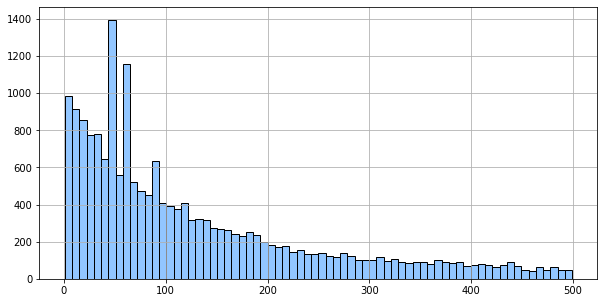

In [391]:
estate_data.query('days_exposition < 500')['days_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black')

___
Большинство квартир продаются в диапазонах от 45 до 60 дней. Посмотрим на эту область ближе.

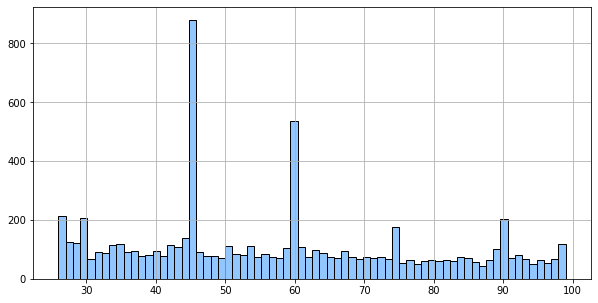

In [392]:
estate_data.query('25 < days_exposition < 100')['days_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black')

___
Интересные пики на количествах дней, кратных 15. Возможно это каким-то образом связано с автоматизацией сбора данных по объявлениям, либо работой риелторов, работающих с продавцами.
В любом случае, даже по эти пикам мы видим что большой объем квартир продаётся до 60-ти дней.   
   
   Далее изучим как различные факторы влияют на стоимость квартир.

In [393]:
def price_on(df, column):
    title_dict = {'rooms_count': 'Зависимость цены от количества комнат', 'floor_category': 'Зависимость цены от этажа',
                  'distance_from_center_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest': 'Зависимость цены от удаленности от центра города'}
    
    
    plt.style.use('seaborn-pastel')
    if column == 'floor_category' or column == 'distance_from_center_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'distance_from_center_category':
        fontsize = 12
    else:
        fontsize = 15
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x = column, y = "last_price", kind = 'bar', ec = 'black', 
                            title = title_dict[column], legend = None, 
                            fontsize = fontsize, figsize = (9,4))
    ax2 = plt.gca()
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    ax2.set_ylabel('Цена, руб.')
    if column != 'cityCenters_nearest':
        plt.xticks(rotation=0)
    return plot

In [394]:
def price_on_box(df, column):
    title_dict = {'rooms_count': 'Зависимость цены от количества комнат', 'floor_category': 'Зависимость цены от этажа',
                  'distance_from_center_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest': 'Зависимость цены от удаленности от центра города'}

    sns.boxplot(data = df, x = column, y = "last_price")

In [395]:
def price_on_box_filtered(df, column):
    title_dict = {'rooms_count': 'Зависимость цены от количества комнат', 'floor_category': 'Зависимость цены от этажа',
                  'distance_from_center_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest': 'Зависимость цены от удаленности от центра города'}
    if column == 'floor_category' or column == 'distance_from_center_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    sns.boxplot(data = df_filtered, x = column, y = "last_price")

___
Зависимость цены от количества комнат.
Помним, что ранее мы ограничили данные диапазоном 0 - 6 комнат.

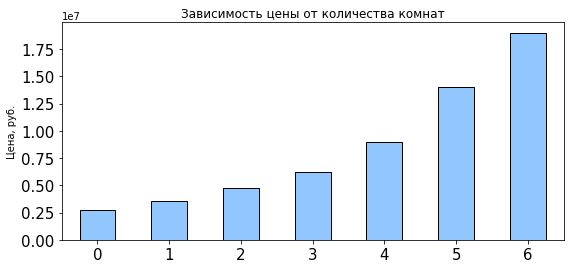

In [396]:
price_on(estate_data.query('rooms_count <= 6'), 'rooms_count')

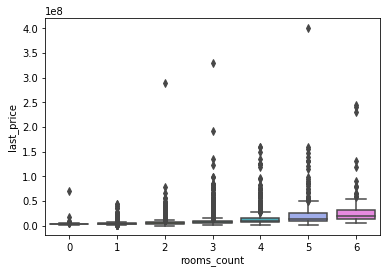

In [397]:
price_on_box(estate_data.query('rooms_count <= 6'), 'rooms_count')

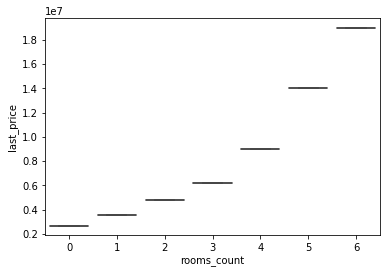

In [398]:
price_on_box_filtered(estate_data.query('rooms_count <= 6'), 'rooms_count')

___
Вполне логично: больше комнат -> выше цена.
   
   Зависимость цены от этажа.

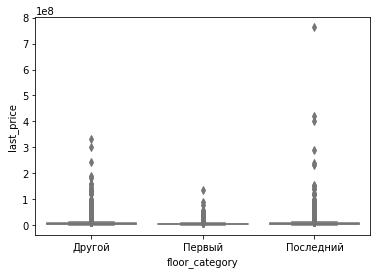

In [399]:
price_on_box(estate_data, 'floor_category')

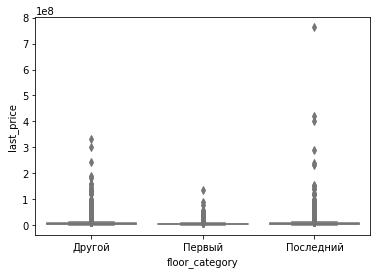

In [400]:
sns.boxplot(data = estate_data, x = estate_data['floor_category'], y = estate_data['last_price'])

___
Снова всё логично: картина рынка недвижимости показывает, что квартиры на первых и последних этажах менее ликвидны, чем на других, как следствие дешевле. Однако на последних этажах часто продают пентхаусы, которые значительно дороже обычных квартир.
   
   Зависимость цены от удаленности от центра.

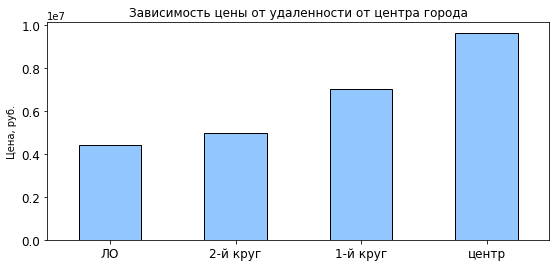

In [401]:
 price_on(estate_data, 'distance_from_center_category')

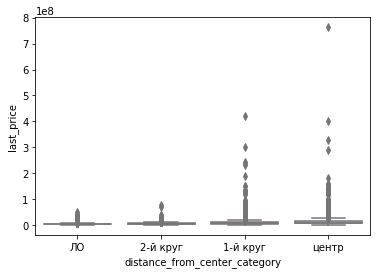

In [402]:
price_on_box(estate_data, 'distance_from_center_category')

___
Чем дальше от центра, тем дешевле квартиры. Ходят легенды, что на Камчатке можно купить двушку с евроремонтом за миллион рублей).
   
   Зависимость стоимости квартиры от дня, месяца и/или года размещения объявления. Для этого напишем новую функцию отрисовки графиков.

In [403]:
def dmy_price(df):
    dmy = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']
   
    for i in range(len(dmy)):
        df_to_plot = df.groupby(dmy[i]).median()['last_price'].reset_index().sort_values(by = dmy[i])
        plot = df_to_plot.plot(x = dmy[i], y = "last_price", kind = 'line', figsize = (10,5),
                               legend = False, title = titles[i], fontsize = 15)
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        ax2.set_ylabel('Цена, руб.')
        if dmy[i] == 'day':
            plt.xticks(rotation=90)
    return plot

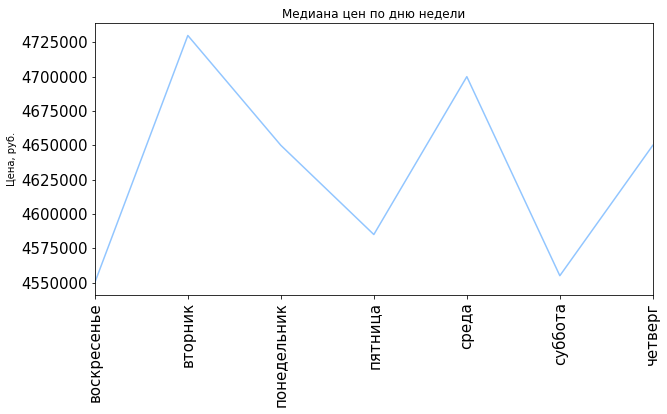

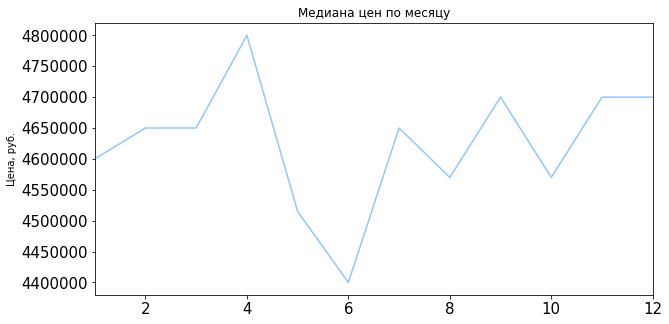

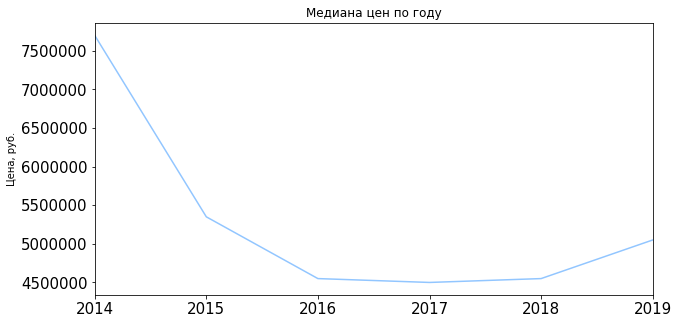

In [404]:
dmy_price(estate_data)

___
Изначально казалось странным пытаться отследидь зависимость цены от дня недели или месяца.
Разберём отдельно каждый случай зависимости от:
 - *дня недели*: так как не привязываемся к конкретной дате - сложно понять, какую зависимость мы тут можем получить. Почему цена должна зависеть от того, рабочий ли день у человека, или выходной...? Причём далеко не все работают в режиме 5/2 с выходными в субботу и воскресенье. При этом мы видим что медиана колеблется примерно в пределах 300000 рублей, что не так много, исходя из общей стоимости квартир.
 - *месяца*: сюда можно просто скопировать и вставить вывод для зависимости от дня недели. Даже колебания медианы примерно в тех же пределах. Однако анализ по месяцам (если привязать месяцы к конкретному году) уже может показать что-то интересное.
 - *года*: а вот результаты этого анализа уже могут буть (и являются в нашем случае) довольно информативными. Стоимость квартир от года в год может меняться по множеству факторов: политических, научных, человеческих и т.д.

___
<a id = 'analize'></a>
**Анализ топ 10 населённых пунктов с наибольшим количеством объявлений.**

In [405]:
top10 = estate_data['locality_name'].value_counts().index.tolist()[:10]
mean10_meters = [estate_data[estate_data['locality_name'] == city]['price_of_m2'].median().round(2) for city in top10]
mean10_prices = [estate_data[estate_data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., руб.': mean10_meters, 'Средняя цена за квартиру, руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., руб.","Средняя цена за квартиру, руб."
0,Санкт-Петербург,104761.0,5500000.0
4,Пушкин,100000.0,5180000.0
8,деревня Кудрово,91860.0,3790000.0
6,посёлок Парголово,91642.0,4100000.0
1,посёлок Мурино,85878.0,3400000.0
2,посёлок Шушары,76876.0,3950000.0
5,Колпино,74723.5,3600000.0
7,Гатчина,67796.0,3100000.0
3,Всеволожск,65789.0,3450000.0
9,Выборг,58158.0,2897000.0


___
Определяем границы центра по ценам квартир.

In [406]:
estate_spb = estate_data.query('locality_name == "Санкт-Петербург"')
estate_spb.loc[:, 'cityCenters_nearest'] = (estate_spb.loc[:, 'cityCenters_nearest']/1000).round()
estate_spb.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_images,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distance_from_center_category,day,month,year,price_of_m2,floor_category,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,755.0,NaN,ЛО,четверг,3,2019,120370,Другой,0.47,0.23
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,574.0,558.0,2-й круг,четверг,8,2015,92785,Другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,234.0,424.0,1-й круг,пятница,7,2015,408176,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,48.0,121.0,1-й круг,вторник,6,2018,100000,Другой,0.32,0.41
7,5,7915000,71.6,2019-04-18,2,NaN,24.0,NaN,22,0,...,NaN,NaN,2-й круг,четверг,4,2019,110544,Другой,NaN,0.26


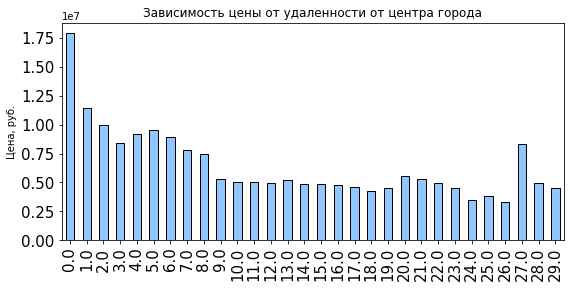

In [407]:
price_on(estate_spb, 'cityCenters_nearest')

Text(0, 0.5, 'Цена, руб.')

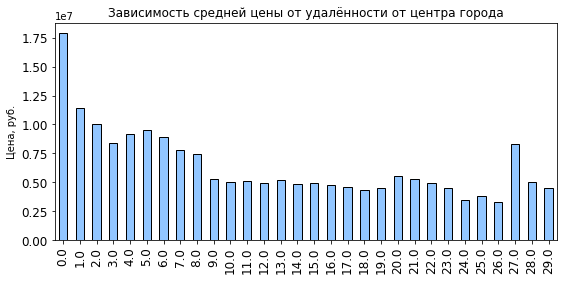

In [408]:
df_filtered = estate_spb.groupby('cityCenters_nearest').median()['last_price'].reset_index().sort_values(by = 'cityCenters_nearest')
plot = df_filtered.plot(x = "cityCenters_nearest", y = "last_price", kind = 'bar', ec = 'black', 
                        title = 'Зависимость средней цены от удалённости от центра города', legend = None, 
                        fontsize = 12, figsize = (9,4))
plt.gca().xaxis.label.set_visible(False)
plt.gca().set_ylabel('Цена, руб.')

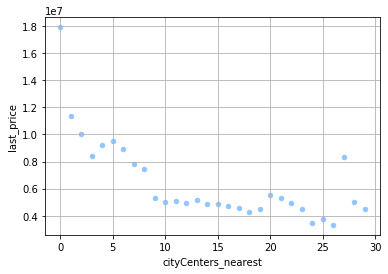

In [409]:
df_filtered.plot(kind = 'scatter', grid = True, x = "cityCenters_nearest", y = "last_price")

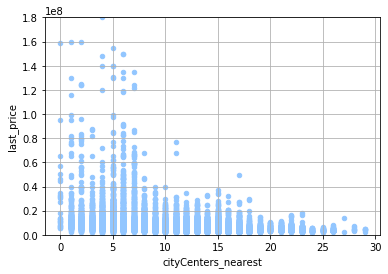

In [410]:
estate_spb.plot(kind = 'scatter', grid = True, x = "cityCenters_nearest", y = "last_price", ylim = (0, 180000000))

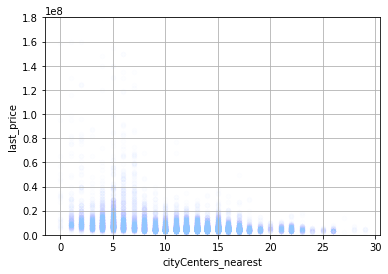

In [411]:
estate_spb.plot(kind = 'scatter', grid = True, x = "cityCenters_nearest", y = "last_price", ylim = (0, 180000000), alpha=0.01)

___
Рассмотрели зависимость как средней, так и медианной цены от расстояния от центра города. Зачительные скачки прослеживаются до расстояния в 8 км, далее цены более менее равномерно уменьшаются.

Далее анализируем этот сегмент.
<a id = 'estate_center'></a>

In [412]:
estate_center = estate_spb.query('cityCenters_nearest <= 8')

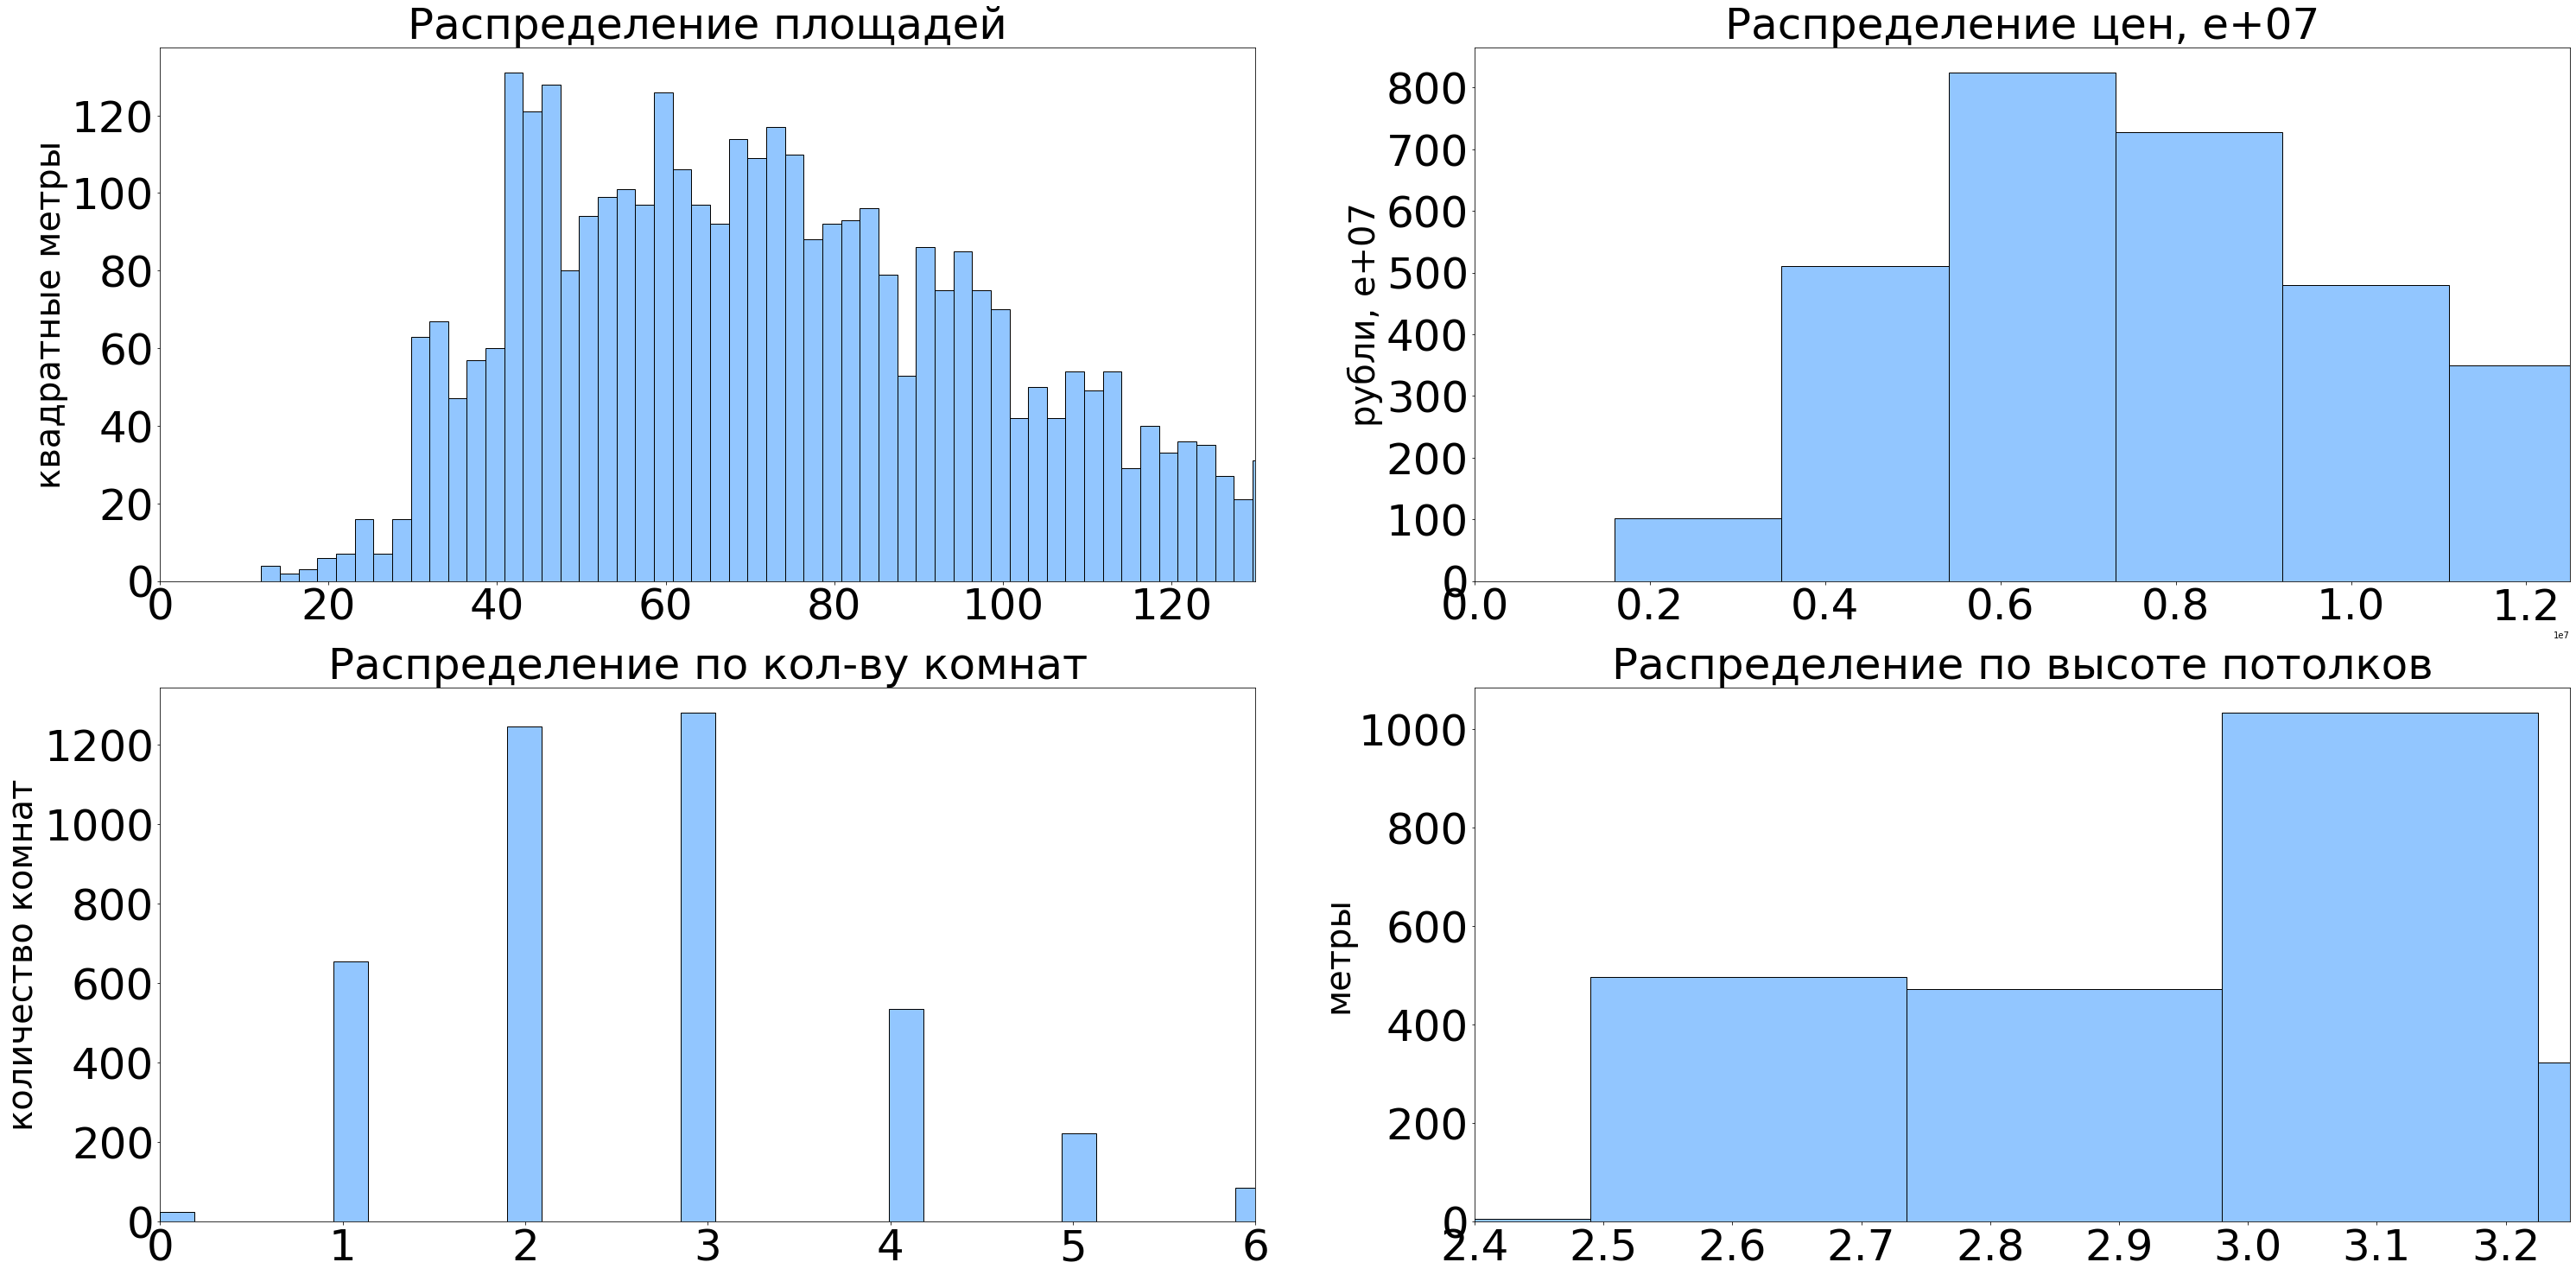

In [413]:
df_list = [estate_center['total_area'], estate_center['last_price'], estate_center['rooms_count'], estate_center['ceiling_height']]
df_titles_list = ['Распределение площадей', 'Распределение цен, e+07', 
                  'Распределение по кол-ву комнат', 'Распределение по высоте потолков']
xlims_list = [130, 1.25e+07, 6, 3.25]
ylabels = ['квадратные метры', 'рубли, e+07', 'количество комнат', 'метры']
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize = (50,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count == 2:
            ax = df_list[count].plot(kind = 'hist', bins = 100, fontsize = 50, title = df_titles_list[count], ec = 'black', ax = axes[r,c])
            ax.set_xlim(0, xlims_list[count])
            ax.set_ylabel(ylabels[count])
        else:
            ax = df_list[count].plot(kind = 'hist', bins = 400, fontsize = 50, title = df_titles_list[count], ec = 'black', ax = axes[r,c])
            ax.set_ylabel(ylabels[count])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.set_ylabel(ylabels[count])
            else:
                ax.set_xlim(0, xlims_list[count])
                ax.set_ylabel(ylabels[count])
        ax.title.set_size(50)
        ax.yaxis.label.set_size(40)
        count += 1

___
   **Наблюдения по гистограммам:**
- "Распределение площадей": большая часть квартир имеет метраж от 40 до 100 кв.м., несколько пиков.
- "Распределение цен": большинство квартир продаются по цене от 4 до 12 млн. руб. Пики приходятся на цены в промежутке между 6 и 10 млн.
- "Распределение по количеству комнат": примерно 2/3 квартир имеют 2 или 3 комнаты, чуть меньший процент имеют 1, 4, и 5 комнат и небольшое количество - 6.
- "Распределение по высоте потолков": большинство квартир имеют потолки высотой более 3 м.


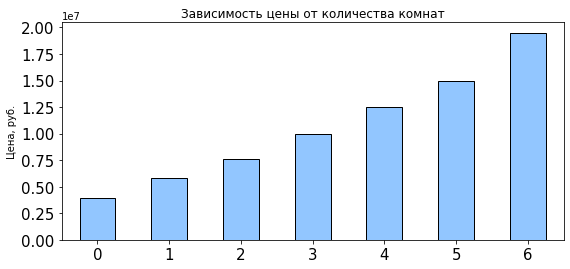

In [414]:
price_on(estate_center.query('rooms_count <= 6'), 'rooms_count')

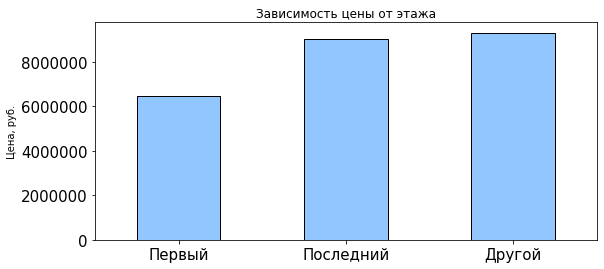

In [415]:
price_on(estate_center, 'floor_category')

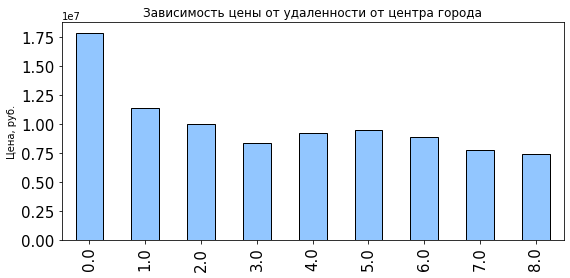

In [416]:
price_on(estate_center, 'cityCenters_nearest')

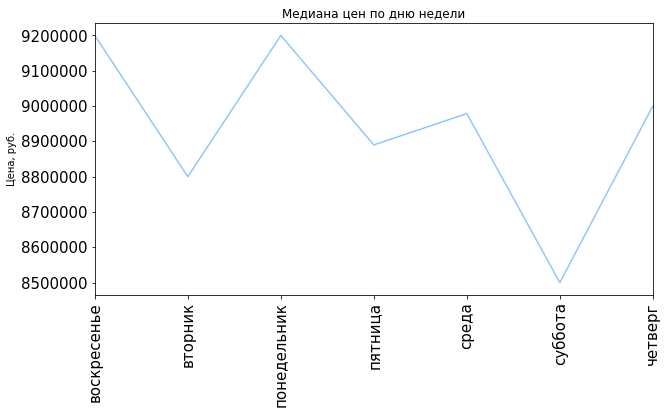

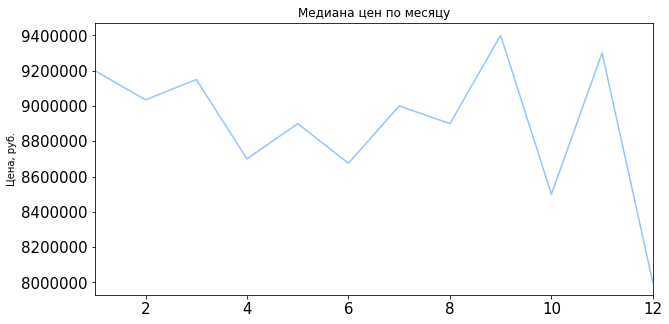

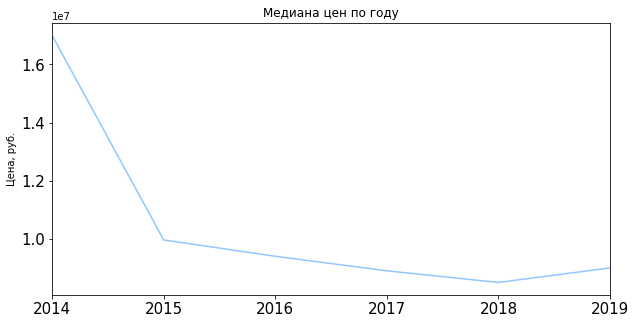

In [417]:
dmy_price(estate_center)

___
**Выводы:**   
   - в центре зависимость цены от количества комнат, этажа, удаленности от центра, даты публикации объявления имеют такие же тенденции, как и для всего набора данных;
   - в центре распределение по площадям имеет больше пиков и чуть будьший разброс, чем для всего набора данных. Нижняя граница диапазона цен выше. Преимущественно попадаются 2-х и 3-х комнатные квартиры. Больше квартир с высотой потолков от 3-х метров.

___
Посмотрим ещё, как влияют определенные параметры на цену квартиры для всего набора данных и для среза по квартирам в центре.

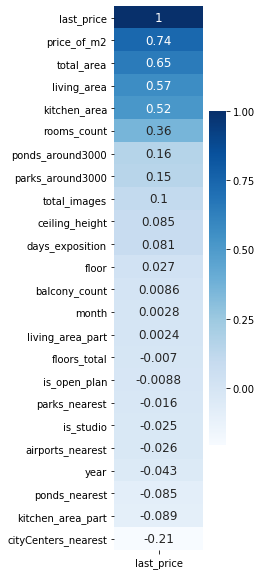

In [418]:
plt.figure(figsize=(2,10))
sns.heatmap(estate_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':12})

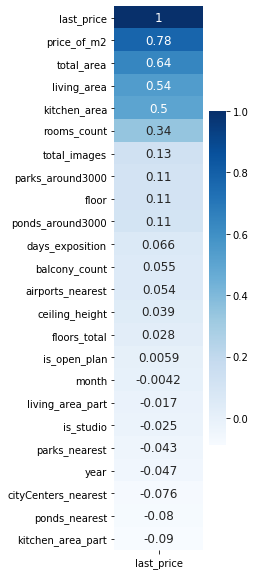

In [419]:
plt.figure(figsize=(2,10))
sns.heatmap(estate_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':12})

___
Как и ожидалось порядок и степень влияния топ 5 параметров совпадают.

<a id = 'step5'></a>
### Шаг 5. Общий вывод

___
Полученный нами датасет имеет огромное количество пропусков. Возможно веб-дизайнерам стоит пересмотреть функционал формы, заполняемой при продаже квартиры.

При этом в самих представленных данных как есть бесполезные нам, например число фотографий квартиры, так и недостает некоторых других. Например если бы нам выдали адрес, то с помощью Яндекс.Геокод-а можно было бы заполнить все пропуски по паркам и прудам, как по количеству, так и расстоянию до ближайшего.

Данные пришлось приводить к нужным нам типам, таким как float, datetime, int. В идеале этот процесс автоматизировать ещё на сталии введения данных пользователем в форме.

Топ 5 факторов, сильнее всего влияющие на конечную квартиру:
- цена квадратного метра;
- общая площадь;
- жилая площадь;
- площадь кухни;
- число комнат.   
При этом, фактически, последние 4 отражают площадь квартиры, а цена квадратного метра сама по себе зависит от многих других параметров.
   
Чем больше площадь квартиры, тем выше конечная цена.     
Чем выше доля жилой площади/площадь кухни, тем выше конечная цена.   
Чем больше комнат, тем выше конечная цена.   
На первом этаже квартиры дешевле.   
Чем ближе к центру, тем дороже квартира.   
Цена квартиры не зависит от дня недели или месяца абстрактного года.   
Квартиры, продаваемые в 2014 году, самые дорогие. 2015-2018 - период низких цен на квартиры (кризис). С 2019 года цены на недвижимость снова стали расти.   

Все найденные взаимосвязи можно увидеть в матрице корреляции ниже.
___
___

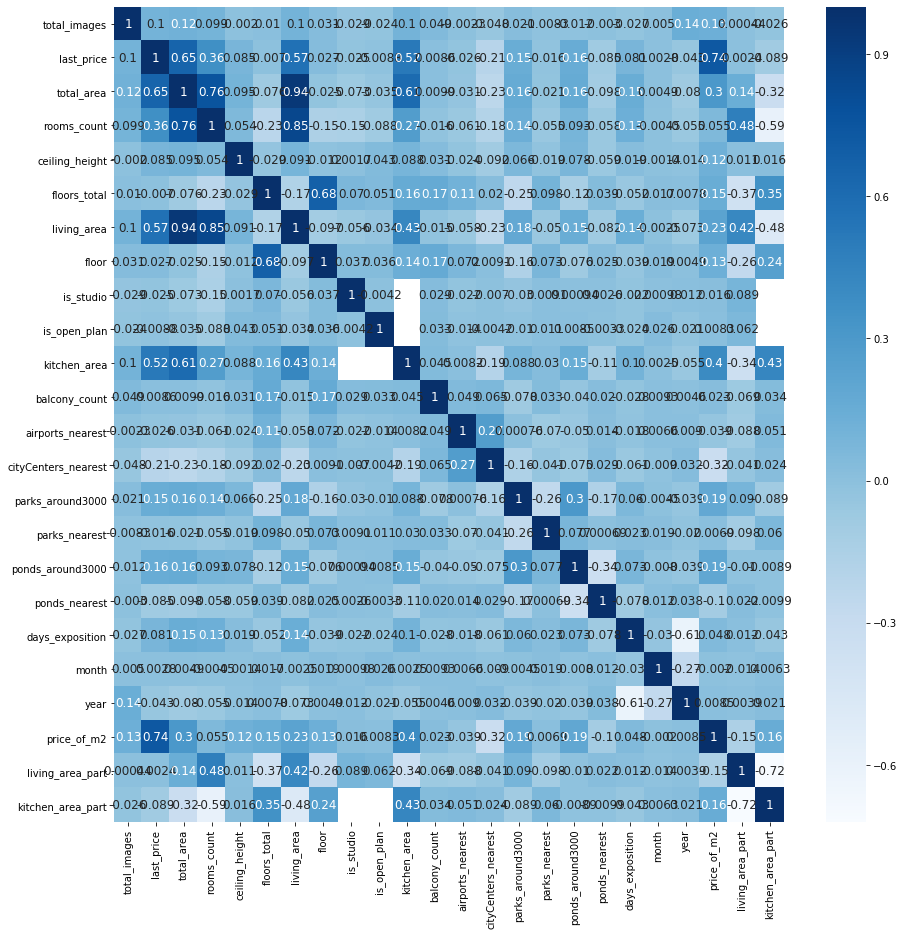

In [420]:
plt.figure(figsize=(15,15))
sns.heatmap(estate_data.corr(), cmap="Blues", annot=True, annot_kws={'size':12})